<a href="https://cognitiveclass.ai"><img src = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/labs_v1/IDSNlogo.png" width = 400> </a>

Guillermo Fantoni 

<h1 align=center><font size = 5>Segmenting and Clustering Neighborhoods in Tornto</font></h1>


In [3]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Solving environment: done

## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs:
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2020.12.5  |       ha878542_0         137 KB  conda-forge
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    geopy-2.1.0                |     pyhd3deb0d_0          64 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         235 KB

The following NEW packages will be INSTALLED:

  geographiclib      conda-forge/noarch::geographiclib-1.50-py_0
  geopy              conda-forge/noarch::geopy-2.1.0-pyhd3deb0d_0

The following packages will be SUPERSEDED by a higher-priority channel:

  ca-certificates    pkgs/main::ca-certificates-2021.4.13-~ --> conda-forge::ca-certificates-

# Question 1  - Obtain the data of neighbourhoods from wikipedia. 

Introduce the web page with the information of neighbourhoods 

In [4]:
url = 'https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M'

In [5]:
results = requests.get(url)

In [6]:
results

<Response [200]>

Obtain the response 200, the extract is correct 

In [7]:
# wikipedia postal code
wiki_pc = wiki_data = pd.read_html(results.text)

Visualize the table with the information. 

In [8]:
toronto_pc = wiki_pc[0]
toronto_pc

,0,1,2,3,4,5,6,7,8
0,M1ANot assigned,M2ANot assigned,M3ANorth York(Parkwoods),M4ANorth York(Victoria Village),M5ADowntown Toronto(Regent Park / Harbourfront),M6ANorth York(Lawrence Manor / Lawrence Heights),M7AQueen's Park(Ontario Provincial Government),M8ANot assigned,M9AEtobicoke(Islington Avenue)
1,M1BScarborough(Malvern / Rouge),M2BNot assigned,M3BNorth York(Don Mills)North,M4BEast York(Parkview Hill / Woodbine Gardens),"M5BDowntown Toronto(Garden District, Ryerson)",M6BNorth York(Glencairn),M7BNot assigned,M8BNot assigned,M9BEtobicoke(West Deane Park / Princess Garden...
2,M1CScarborough(Rouge Hill / Port Union / Highl...,M2CNot assigned,M3CNorth York(Don Mills)South(Flemingdon Park),M4CEast York(Woodbine Heights),M5CDowntown Toronto(St. James Town),M6CYork(Humewood-Cedarvale),M7CNot assigned,M8CNot assigned,M9CEtobicoke(Eringate / Bloordale Gardens / Ol...
3,M1EScarborough(Guildwood / Morningside / West ...,M2ENot assigned,M3ENot assigned,M4EEast Toronto(The Beaches),M5EDowntown Toronto(Berczy Park),M6EYork(Caledonia-Fairbanks),M7ENot assigned,M8ENot assigned,M9ENot assigned
4,M1GScarborough(Woburn),M2GNot assigned,M3GNot assigned,M4GEast York(Leaside),M5GDowntown Toronto(Central Bay Street),M6GDowntown Toronto(Christie),M7GNot assigned,M8GNot assigned,M9GNot assigned
5,M1HScarborough(Cedarbrae),M2HNorth York(Hillcrest Village),M3HNorth York(Bathurst Manor / Wilson Heights ...,M4HEast York(Thorncliffe Park),M5HDowntown Toronto(Richmond / Adelaide / King),M6HWest Toronto(Dufferin / Dovercourt Village),M7HNot assigned,M8HNot assigned,M9HNot assigned
6,M1JScarborough(Scarborough Village),M2JNorth York(Fairview / Henry Farm / Oriole),M3JNorth York(Northwood Park / York University),M4JEast YorkEast Toronto(The Danforth East),M5JDowntown Toronto(Harbourfront East / Union ...,M6JWest Toronto(Little Portugal / Trinity),M7JNot assigned,M8JNot assigned,M9JNot assigned
7,M1KScarborough(Kennedy Park / Ionview / East B...,M2KNorth York(Bayview Village),M3KNorth York(Downsview)East (CFB Toronto),M4KEast Toronto(The Danforth West / Riverdale),M5KDowntown Toronto(Toronto Dominion Centre / ...,M6KWest Toronto(Brockton / Parkdale Village / ...,M7KNot assigned,M8KNot assigned,M9KNot assigned
8,M1LScarborough(Golden Mile / Clairlea / Oakridge),M2LNorth York(York Mills / Silver Hills),M3LNorth York(Downsview)West,M4LEast Toronto(India Bazaar / The Beaches West),M5LDowntown Toronto(Commerce Court / Victoria ...,M6LNorth York(North Park / Maple Leaf Park / U...,M7LNot assigned,M8LNot assigned,M9LNorth York(Humber Summit)
9,M1MScarborough(Cliffside / Cliffcrest / Scarbo...,M2MNorth York(Willowdale / Newtonbrook),M3MNorth York(Downsview)Central,M4MEast Toronto(Studio District),M5MNorth York(Bedford Park / Lawrence Manor East),M6MYork(Del Ray / Mount Dennis / Keelsdale and...,M7MNot assigned,M8MNot assigned,M9MNorth York(Humberlea / Emery)


Process the info to convert a Data Frame 

In [9]:
columns = ['postal_code','borough', 'neighbourhood']
toronto_clean = pd.DataFrame(columns=columns)
count = 0
for i in range(0,20):
    for x in range(0,9):
        a = str(toronto_pc.loc[i,x]).split('(')
        toronto_clean.loc[count,'postal_code'] = str(toronto_pc.loc[i,x])[0:3]
        toronto_clean.loc[count,'borough'] = str(a[0])[3:]
        if len(a)>1:
            neig = a[1].replace( ')' , '')
            neig = neig.replace(' / ', ', ')
            toronto_clean.loc[count,'postal_code'] = str(toronto_pc.loc[i,x])[0:3]
            toronto_clean.loc[count,'borough'] = str(a[0])[3:]
            toronto_clean.loc[count,'neighbourhood'] = neig
        count = count + 1 

toronto_clean.head(10)

,postal_code,borough,neighbourhood
0,M1A,Not assigned,NaN
1,M2A,Not assigned,NaN
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,"Regent Park, Harbourfront"
5,M6A,North York,"Lawrence Manor, Lawrence Heights"
6,M7A,Queen's Park,Ontario Provincial Government
7,M8A,Not assigned,NaN
8,M9A,Etobicoke,Islington Avenue
9,M1B,Scarborough,"Malvern, Rouge"


Clean the Null values 

In [10]:
toronto_cleaned = toronto_clean[toronto_clean["borough"] != "Not assigned"]
toronto_cleaned.head()

,postal_code,borough,neighbourhood
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,"Regent Park, Harbourfront"
5,M6A,North York,"Lawrence Manor, Lawrence Heights"
6,M7A,Queen's Park,Ontario Provincial Government


Show the shape of the data before and after clean it 

In [11]:
print(toronto_clean.shape, toronto_cleaned.shape)
print(toronto_clean[toronto_clean["borough"] == "Not assigned"].shape)

(180, 3) (103, 3)
(77, 3)


In [12]:
toronto_cleaned = toronto_cleaned.reset_index()
toronto_cleaned.head()

,index,postal_code,borough,neighbourhood
0,2,M3A,North York,Parkwoods
1,3,M4A,North York,Victoria Village
2,4,M5A,Downtown Toronto,"Regent Park, Harbourfront"
3,5,M6A,North York,"Lawrence Manor, Lawrence Heights"
4,6,M7A,Queen's Park,Ontario Provincial Government


In [13]:
toronto_cleaned.drop(['index'], axis = 'columns', inplace = True)
toronto_cleaned.head()

,postal_code,borough,neighbourhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,"Regent Park, Harbourfront"
3,M6A,North York,"Lawrence Manor, Lawrence Heights"
4,M7A,Queen's Park,Ontario Provincial Government


Final size of data frame

In [14]:
toronto_cleaned.shape

(103, 3)

Export to CSV the data 

In [15]:
toronto_cleaned.to_csv('Toronto_postal_codes.csv', index=False)  

# Question 2 - Obtain coordinates
obtain the coordinates from the postal codes

In [17]:
pip install geocoder

Note: you may need to restart the kernel to use updated packages.


Obtain withg geocoder nominatim the locations of the neighbourhoods

In [18]:
geolocator = Nominatim(user_agent="ny_explorer")
location =  geolocator.geocode('{}, Toronto, Ontario'.format('East York'))
latitude = location.latitude
longitude = location.longitude
print(latitude,longitude)

43.699971000000005 -79.33251996261595


I have tried to work with the geocoder in many ways, but have not gotten any results.
I prefer to use Nominatim and filter by Neighborhood, it is the most accurate I have found.

In [19]:

import geocoder # import geocoder

# initialize your variable to None
lat_lng_coords = None

# loop until you get the coordinates

g = geocoder.google('{}, Toronto, Ontario'.format('East York'))
lat_lng_coords = g.latlng

latitude = lat_lng_coords[0]
longitude = lat_lng_coords[1]

TypeError: 'NoneType' object is not subscriptable

Obtain for each neighbourhood the coordinates

In [20]:
toronto_cleaned_cord = pd.DataFrame(columns = ['neighbourhood','latitude', 'longitude'])

geolocator = Nominatim(user_agent="toronto_explorer")
location1 =  geolocator.geocode('{}, Toronto, Ontario'.format('Parkwoods'))
count = 0
for neig in toronto_cleaned['neighbourhood']:
    location = geolocator.geocode('{}, Toronto'.format(neig))
    if type(location1) == type(location):
        latitude = location.latitude
        longitude = location.longitude
        toronto_cleaned_cord = toronto_cleaned_cord.append({"neighbourhood": neig , "latitude":latitude, "longitude":longitude}, ignore_index=True)
    else:
        toronto_cleaned_cord = toronto_cleaned_cord.append({"neighbourhood": neig , "latitude":np.nan, "longitude":np.nan}, ignore_index=True)

Obtain many null values

In [21]:
toronto_cleaned_cord.head()

,neighbourhood,latitude,longitude
0,Parkwoods,43.758800,-79.320197
1,Victoria Village,43.732658,-79.311189
2,"Regent Park, Harbourfront",NaN,NaN
3,"Lawrence Manor, Lawrence Heights",43.716391,-79.442566
4,Ontario Provincial Government,NaN,NaN


In [22]:
toronto_data = toronto_cleaned.join(toronto_cleaned_cord.set_index('neighbourhood'), on='neighbourhood', how='inner')
toronto_data.head()
#Repeat the process with the borough and postal code? 

,postal_code,borough,neighbourhood,latitude,longitude
0,M3A,North York,Parkwoods,43.758800,-79.320197
1,M4A,North York,Victoria Village,43.732658,-79.311189
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",NaN,NaN
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.716391,-79.442566
4,M7A,Queen's Park,Ontario Provincial Government,NaN,NaN


In [23]:
toronto_data['latitude'].isna().sum()

51

51 total null values, import the data from the course to join with the neighbourhood data

In [24]:
toronto_data_csv = pd.read_csv('Geospatial_Coordinates.csv')
toronto_data_csv.head(5)

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


In [25]:
toronto_data_csv.dtypes
toronto_cleaned.dtypes

postal_code      object
borough          object
neighbourhood    object
dtype: object

In [26]:
toronto_data_csv.shape

(103, 3)

Join all data to obtain the necessary information of the neighbourhoods

In [27]:
toronto_data2 = toronto_cleaned.join(toronto_data_csv.set_index('Postal Code'), on='postal_code', how='inner')
toronto_data2.head(10)

,postal_code,borough,neighbourhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.753259,-79.329656
1,M4A,North York,Victoria Village,43.725882,-79.315572
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763
4,M7A,Queen's Park,Ontario Provincial Government,43.662301,-79.389494
5,M9A,Etobicoke,Islington Avenue,43.667856,-79.532242
6,M1B,Scarborough,"Malvern, Rouge",43.806686,-79.194353
7,M3B,North York,Don MillsNorth,43.745906,-79.352188
8,M4B,East York,"Parkview Hill, Woodbine Gardens",43.706397,-79.309937
9,M5B,Downtown Toronto,"Garden District, Ryerson",43.657162,-79.378937


The final dimensions are 103 rows and 5 columns

In [28]:
toronto_data2.shape

(103, 5)

Export the data to csv

In [29]:
toronto_data2.to_csv("Toronto_PC_COR.csv",index = False)

# Question 3 - Explore and cluster the neighborhoods in Toronto.

review if K nearest neighboor is better than kn means
and review the order and the text, see the concept but not the same text, change variables ;)

In [30]:
import pandas as pd
toronto_data2 = pd.read_csv("Toronto_PC_COR.csv")

In [31]:
address = 'Toronto, Ontario'
geolocator = Nominatim(user_agent="toronto_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The coordinates of Toronto are {}, {}.'.format(latitude, longitude))

The coordinates of Toronto are 43.6534817, -79.3839347.


In [32]:
import folium

In [33]:
# Creating the map of Toronto
map_Toronto = folium.Map(location=[latitude, longitude], zoom_start=11)

# adding markers to map
for latitude, longitude, borough, neighbourhood in zip(toronto_data2['Latitude'], toronto_data2['Longitude'], toronto_data2['borough'], toronto_data2['neighbourhood']):
    label = '{}, {}'.format(neighbourhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [latitude, longitude],
        radius=5,
        popup=label,
        color='blue',
        fill=True
        ).add_to(map_Toronto)  
    
map_Toronto

In [34]:
CLIENT_ID = 'Y0ODHO3QHK1V4TQVTXXLKAGIAOTUYL4A5HLRT1JR2BWT3VPJ'
CLIENT_SECRET = 'XSUNQHUJXTOPQLOUDU1U043GADNS5TBIUTF5HXPBHY1SMPK2'
ACCESS_TOKEN = 'PZ2VS2ITJRIWOKUVJDYHHXM2QFWEVVIJ0CTTJGTZB34WRXZA' # your FourSquare Access Token
CODE= 'Q3EJBBH1TJMIRBEEB2ILVALVJIP3G0URJPMRE40RPCGVBXPL#_=_'
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: Y0ODHO3QHK1V4TQVTXXLKAGIAOTUYL4A5HLRT1JR2BWT3VPJ
CLIENT_SECRET:XSUNQHUJXTOPQLOUDU1U043GADNS5TBIUTF5HXPBHY1SMPK2


In [35]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            20180605, 
            lat, 
            lng, 
            radius
            )
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighbourhood', 
                  'Neighbourhood Latitude', 
                  'Neighbourhood Longitude', 
                  'Venue', 
                  'Venue Category']
    
    return(nearby_venues)

In [36]:
venues_in_toronto = getNearbyVenues(toronto_data2['neighbourhood'], toronto_data2['Latitude'], toronto_data2['Longitude'])

Parkwoods
Victoria Village
Regent Park, Harbourfront
Lawrence Manor, Lawrence Heights
Ontario Provincial Government
Islington Avenue
Malvern, Rouge
Don MillsNorth
Parkview Hill, Woodbine Gardens
Garden District, Ryerson
Glencairn
West Deane Park, Princess Gardens, Martin Grove, Islington, Cloverdale
Rouge Hill, Port Union, Highland Creek
Don MillsSouth
Woodbine Heights
St. James Town
Humewood-Cedarvale
Eringate, Bloordale Gardens, Old Burnhamthorpe, Markland Wood
Guildwood, Morningside, West Hill
The Beaches
Berczy Park
Caledonia-Fairbanks
Woburn
Leaside
Central Bay Street
Christie
Cedarbrae
Hillcrest Village
Bathurst Manor, Wilson Heights, Downsview North
Thorncliffe Park
Richmond, Adelaide, King
Dufferin, Dovercourt Village
Scarborough Village
Fairview, Henry Farm, Oriole
Northwood Park, York University
The Danforth East
Harbourfront East, Union Station, Toronto Islands
Little Portugal, Trinity
Kennedy Park, Ionview, East Birchmount Park
Bayview Village
DownsviewEast 
The Danforth We

In [37]:
venues_in_toronto.head()

,Neighbourhood,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Category
0,Parkwoods,43.753259,-79.329656,Brookbanks Park,Park
1,Parkwoods,43.753259,-79.329656,Brookbanks Pool,Pool
2,Parkwoods,43.753259,-79.329656,Variety Store,Food & Drink Shop
3,Victoria Village,43.725882,-79.315572,Victoria Village Arena,Hockey Arena
4,Victoria Village,43.725882,-79.315572,Portugril,Portuguese Restaurant


# WORDCLOUD

In [38]:
texto = " "
for venue in venues_in_toronto['Venue Category']:
    texto += str(' ')
    texto += str(venue).replace(" ","")

In [39]:
venue_frecuency = venues_in_toronto['Venue Category'].value_counts()

venue_frecuency.head(10)

Coffee Shop           96
Café                  71
Park                  43
Restaurant            39
Pizza Place           38
Sandwich Place        32
Bakery                31
Italian Restaurant    25
Bank                  21
Grocery Store         21
Name: Venue Category, dtype: int64

In [40]:
# install wordcloud
!conda install -c conda-forge wordcloud==1.4.1 --yes

# import package and its set of stopwords
from wordcloud import WordCloud, STOPWORDS

print ('Wordcloud is installed and imported!')

Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: done

## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs:
    - wordcloud==1.4.1


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    wordcloud-1.4.1            |           py36_0         324 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         324 KB

The following NEW packages will be INSTALLED:

  wordcloud          conda-forge/linux-64::wordcloud-1.4.1-py36_0



wordcloud-1.4.1      | 324 KB    | ##################################### | 100% 
Preparing transaction: done
Verifying transaction: done
Executing transaction: done
Wordcloud is installed and imported!


In [42]:
stopwords = set(STOPWORDS)

In [43]:
import numpy as np

In [46]:
toronto_wc = WordCloud(
    background_color='white',
    max_words=2000,
    stopwords=stopwords
)

# generate the word cloud
toronto_wc.generate(texto)

In [47]:
import matplotlib.pyplot as plt

### Show the most common venues in Toronto 

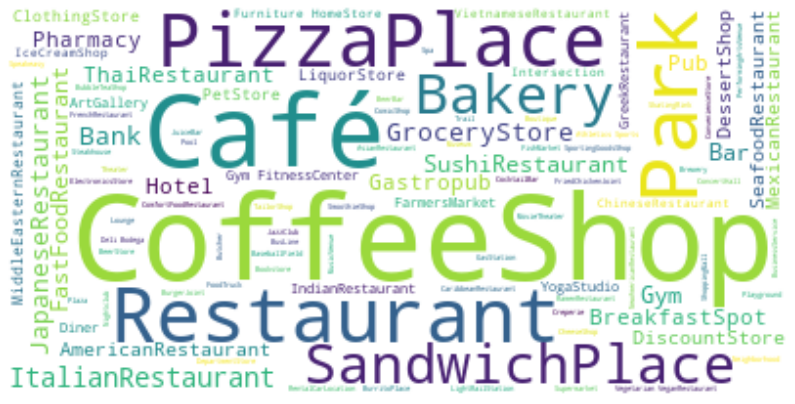

In [49]:
fig = plt.figure()
fig.set_figwidth(14) # set width
fig.set_figheight(18) # set height

plt.imshow(toronto_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

In [50]:
venue_frecuency.head(10)

Coffee Shop           96
Café                  71
Park                  43
Restaurant            39
Pizza Place           38
Sandwich Place        32
Bakery                31
Italian Restaurant    25
Bank                  21
Grocery Store         21
Name: Venue Category, dtype: int64

In [51]:
venue_frecuency2 = venues_in_toronto[['Neighbourhood','Venue Category']]
venue_frecuency2.head(10)

,Neighbourhood,Venue Category
0,Parkwoods,Park
1,Parkwoods,Pool
2,Parkwoods,Food & Drink Shop
3,Victoria Village,Hockey Arena
4,Victoria Village,Portuguese Restaurant
5,Victoria Village,Coffee Shop
6,Victoria Village,Pizza Place
7,"Regent Park, Harbourfront",Bakery
8,"Regent Park, Harbourfront",Coffee Shop
9,"Regent Park, Harbourfront",Distribution Center


### Group the neighbourhoods by most common venues 

In [52]:
venue_frecuency2.groupby('Neighbourhood')['Venue Category'].value_counts().head()

Neighbourhood           Venue Category           
Agincourt               Breakfast Spot               1
                        Latin American Restaurant    1
                        Lounge                       1
                        Skating Rink                 1
Alderwood, Long Branch  Pizza Place                  2
Name: Venue Category, dtype: int64

In [53]:
venues_in_toronto.groupby('Venue Category').max().shape

(239, 4)

Get dummies to count the number of venue category for each neighbourhood

In [54]:
toronto_venue_cat = pd.get_dummies(venues_in_toronto[['Venue Category']], prefix="", prefix_sep="")
toronto_venue_cat.head()

,Accessories Store,Adult Boutique,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Garage,Auto Workshop,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Basketball Court,Basketball Stadium,Beer Bar,Beer Store,Belgian Restaurant,Bike Shop,Bistro,Boat or Ferry,Bookstore,Boutique,Breakfast Spot,Brewery,Bridal Shop,Bubble Tea Shop,Burger Joint,Burrito Place,Bus Line,Bus Station,Bus Stop,Business Service,Butcher,Cafeteria,Café,Cajun / Creole Restaurant,Camera Store,Candy Store,Caribbean Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Arts Building,College Auditorium,College Gym,College Rec Center,College Stadium,Colombian Restaurant,Comfort Food Restaurant,Comic Shop,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Coworking Space,Creperie,Cuban Restaurant,Curling Ice,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distribution Center,Dog Run,Donut Shop,Drugstore,Eastern European Restaurant,Electronics Store,Escape Room,Ethiopian Restaurant,Fabric Shop,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Field,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food & Drink Shop,Food Court,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,Gift Shop,Gluten-free Restaurant,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Hakka Restaurant,Harbor / Marina,Hardware Store,Health Food Store,Historic Site,History Museum,Hobby Shop,Hockey Arena,Home Service,Hotel,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Intersection,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Korean BBQ Restaurant,Korean Restaurant,Lake,Latin American Restaurant,Light Rail Station,Liquor Store,Lounge,Market,Martial Arts School,Massage Studio,Medical Center,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Monument / Landmark,Motel,Movie Theater,Museum,Music Venue,Neighborhood,New American Restaurant,Nightclub,Noodle House,Office,Opera House,Organic Grocery,Park,Performing Arts Venue,Pet Store,Pharmacy,Piano Bar,Pizza Place,Plane,Playground,Plaza,Poke Place,Pool,Portuguese Restaurant,Poutine Place,Pub,Ramen Restaurant,Record Shop,Rental Car Location,Restaurant,River,Roof Deck,Salad Place,Salon / Barbershop,Sandwich Place,Sculpture Garden,Seafood Restaurant,Shoe Store,Shopping Mall,Skate Park,Skating Rink,Smoke Shop,Smoothie Shop,Soccer Field,Social Club,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,Stadium,Stationery Store,Steakhouse,Supermarket,Supplement Shop,Sushi Restaurant,Swim School,Tailor Shop,Taiwanese Restaurant,Tanning Salon,Tea Room,Tennis Court,Thai Restaurant,Theater,Theme Restaurant,Tibetan Restaurant,Toy / Game Store,Trail,Train Station,Truck Stop,Turkish Restaurant,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wings Joint,Women's Store,Yoga Studio
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [55]:
toronto_venue_cat['Neighbourhood'] = venues_in_toronto['Neighbourhood'] 
fixed_columns = [toronto_venue_cat.columns[-1]] + list(toronto_venue_cat.columns[:-1])
toronto_venue_cat = toronto_venue_cat[fixed_columns]

toronto_venue_cat.head()

,Neighbourhood,Accessories Store,Adult Boutique,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Garage,Auto Workshop,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Basketball Court,Basketball Stadium,Beer Bar,Beer Store,Belgian Restaurant,Bike Shop,Bistro,Boat or Ferry,Bookstore,Boutique,Breakfast Spot,Brewery,Bridal Shop,Bubble Tea Shop,Burger Joint,Burrito Place,Bus Line,Bus Station,Bus Stop,Business Service,Butcher,Cafeteria,Café,Cajun / Creole Restaurant,Camera Store,Candy Store,Caribbean Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Arts Building,College Auditorium,College Gym,College Rec Center,College Stadium,Colombian Restaurant,Comfort Food Restaurant,Comic Shop,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Coworking Space,Creperie,Cuban Restaurant,Curling Ice,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distribution Center,Dog Run,Donut Shop,Drugstore,Eastern European Restaurant,Electronics Store,Escape Room,Ethiopian Restaurant,Fabric Shop,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Field,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food & Drink Shop,Food Court,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,Gift Shop,Gluten-free Restaurant,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Hakka Restaurant,Harbor / Marina,Hardware Store,Health Food Store,Historic Site,History Museum,Hobby Shop,Hockey Arena,Home Service,Hotel,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Intersection,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Korean BBQ Restaurant,Korean Restaurant,Lake,Latin American Restaurant,Light Rail Station,Liquor Store,Lounge,Market,Martial Arts School,Massage Studio,Medical Center,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Monument / Landmark,Motel,Movie Theater,Museum,Music Venue,Neighborhood,New American Restaurant,Nightclub,Noodle House,Office,Opera House,Organic Grocery,Park,Performing Arts Venue,Pet Store,Pharmacy,Piano Bar,Pizza Place,Plane,Playground,Plaza,Poke Place,Pool,Portuguese Restaurant,Poutine Place,Pub,Ramen Restaurant,Record Shop,Rental Car Location,Restaurant,River,Roof Deck,Salad Place,Salon / Barbershop,Sandwich Place,Sculpture Garden,Seafood Restaurant,Shoe Store,Shopping Mall,Skate Park,Skating Rink,Smoke Shop,Smoothie Shop,Soccer Field,Social Club,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,Stadium,Stationery Store,Steakhouse,Supermarket,Supplement Shop,Sushi Restaurant,Swim School,Tailor Shop,Taiwanese Restaurant,Tanning Salon,Tea Room,Tennis Court,Thai Restaurant,Theater,Theme Restaurant,Tibetan Restaurant,Toy / Game Store,Trail,Train Station,Truck Stop,Turkish Restaurant,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wings Joint,Women's Store,Yoga Studio
0,Parkwoods,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Parkwoods,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

Group by neighbourhood and calculate the mean to obtain the frequency 

In [56]:
toronto_grouped = toronto_venue_cat.groupby('Neighbourhood').mean().reset_index()
toronto_grouped.head()

,Neighbourhood,Accessories Store,Adult Boutique,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Garage,Auto Workshop,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Basketball Court,Basketball Stadium,Beer Bar,Beer Store,Belgian Restaurant,Bike Shop,Bistro,Boat or Ferry,Bookstore,Boutique,Breakfast Spot,Brewery,Bridal Shop,Bubble Tea Shop,Burger Joint,Burrito Place,Bus Line,Bus Station,Bus Stop,Business Service,Butcher,Cafeteria,Café,Cajun / Creole Restaurant,Camera Store,Candy Store,Caribbean Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Arts Building,College Auditorium,College Gym,College Rec Center,College Stadium,Colombian Restaurant,Comfort Food Restaurant,Comic Shop,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Coworking Space,Creperie,Cuban Restaurant,Curling Ice,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distribution Center,Dog Run,Donut Shop,Drugstore,Eastern European Restaurant,Electronics Store,Escape Room,Ethiopian Restaurant,Fabric Shop,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Field,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food & Drink Shop,Food Court,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,Gift Shop,Gluten-free Restaurant,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Hakka Restaurant,Harbor / Marina,Hardware Store,Health Food Store,Historic Site,History Museum,Hobby Shop,Hockey Arena,Home Service,Hotel,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Intersection,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Korean BBQ Restaurant,Korean Restaurant,Lake,Latin American Restaurant,Light Rail Station,Liquor Store,Lounge,Market,Martial Arts School,Massage Studio,Medical Center,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Monument / Landmark,Motel,Movie Theater,Museum,Music Venue,Neighborhood,New American Restaurant,Nightclub,Noodle House,Office,Opera House,Organic Grocery,Park,Performing Arts Venue,Pet Store,Pharmacy,Piano Bar,Pizza Place,Plane,Playground,Plaza,Poke Place,Pool,Portuguese Restaurant,Poutine Place,Pub,Ramen Restaurant,Record Shop,Rental Car Location,Restaurant,River,Roof Deck,Salad Place,Salon / Barbershop,Sandwich Place,Sculpture Garden,Seafood Restaurant,Shoe Store,Shopping Mall,Skate Park,Skating Rink,Smoke Shop,Smoothie Shop,Soccer Field,Social Club,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,Stadium,Stationery Store,Steakhouse,Supermarket,Supplement Shop,Sushi Restaurant,Swim School,Tailor Shop,Taiwanese Restaurant,Tanning Salon,Tea Room,Tennis Court,Thai Restaurant,Theater,Theme Restaurant,Tibetan Restaurant,Toy / Game Store,Trail,Train Station,Truck Stop,Turkish Restaurant,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wings Joint,Women's Store,Yoga Studio
0,Agincourt,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.25,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0

### Obtain the ten most common venue categories for each neighbourhood

In [57]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [58]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighbourhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighbourhood'] = toronto_grouped['Neighbourhood']

for ind in np.arange(toronto_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(toronto_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Agincourt,Latin American Restaurant,Breakfast Spot,Skating Rink,Lounge,Yoga Studio,Department Store,Electronics Store,Eastern European Restaurant,Drugstore,Donut Shop
1,"Alderwood, Long Branch",Pizza Place,Sandwich Place,Pub,Coffee Shop,Gym,General Entertainment,Creperie,Dog Run,Distribution Center,Discount Store
2,"Bathurst Manor, Wilson Heights, Downsview North",Coffee Shop,Bank,Park,Pharmacy,Pizza Place,Convenience Store,Mobile Phone Shop,Middle Eastern Restaurant,Restaurant,Ice Cream Shop
3,Bayview Village,Chinese Restaurant,Bank,Japanese Restaurant,Café,Yoga Studio,Department Store,Electronics Store,Eastern European Restaurant,Drugstore,Donut Shop
4,"Bedford Park, Lawrence Manor East",Sandwich Place,Coffee Shop,Restaurant,Italian Restaurant,Grocery Store,Thai Restaurant,Juice Bar,Butcher,Indian Restaurant,Fast Food Restaurant


## Cluster the neighbourhoods with K-MEANS by venues 

In [59]:
from sklearn.cluster import KMeans

Create a Kmeans with 10 clusters

In [60]:
k_num_clusters = 10

toronto_grouped_clustering = toronto_grouped.drop('Neighbourhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=k_num_clusters, random_state=0).fit(toronto_grouped_clustering)
kmeans

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=10, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [61]:
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 8, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 7, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       7, 0, 1, 1, 1, 0, 1, 0, 1, 1, 3, 0, 1, 4, 1, 0, 1, 1, 7, 1, 1, 1,
       9, 1, 1, 0, 5, 1, 1, 1, 7, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 9, 1, 1,
       1, 1, 6, 1, 8, 1, 0, 1, 1, 1, 1, 0, 2], dtype=int32)

In [62]:
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

Join the data with the cluster labels

In [63]:
toronto_merged = toronto_data2

toronto_merged = toronto_merged.join(neighborhoods_venues_sorted.set_index('Neighbourhood'), on='neighbourhood')

toronto_merged.head()

,postal_code,borough,neighbourhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,M3A,North York,Parkwoods,43.753259,-79.329656,9.0,Park,Pool,Food & Drink Shop,Yoga Studio,Curling Ice,Drugstore,Donut Shop,Dog Run,Distribution Center,Discount Store
1,M4A,North York,Victoria Village,43.725882,-79.315572,1.0,Pizza Place,Coffee Shop,Hockey Arena,Portuguese Restaurant,Diner,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Distribution Center
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636,1.0,Coffee Shop,Bakery,Park,Theater,Breakfast Spot,Historic Site,French Restaurant,Farmers Market,Distribution Center,Dessert Shop
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763,1.0,Clothing Store,Furniture / Home Store,Accessories Store,Coffee Shop,Boutique,Vietnamese Restaurant,Miscellaneous Shop,Diner,Department Store,Dessert Shop
4,M7A,Queen's Park,Ontario Provincial Government,43.662301,-79.389494,1.0,Coffee Shop,Sushi Restaurant,Yoga Studio,Creperie,Bank,Italian Restaurant,Beer Bar,Café,Mexican Restaurant,Japanese Restaurant


In [64]:
toronto_merged_nonan = toronto_merged.dropna(subset=['Cluster Labels'])

In [65]:
import matplotlib.cm as cm
import matplotlib.colors as colors

Show the data with folium

In [66]:
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(k_num_clusters)
ys = [i + x + (i*x)**2 for i in range(k_num_clusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(toronto_merged_nonan['Latitude'], toronto_merged_nonan['Longitude'], toronto_merged_nonan['neighbourhood'], toronto_merged_nonan['Cluster Labels']):
    label = folium.Popup('Cluster ' + str(int(cluster) +1) + '\n' + str(poi) , parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[int(cluster-1)],
        fill=True,
        fill_color=rainbow[int(cluster-1)]
        ).add_to(map_clusters)
        
map_clusters

### Analyze the most common venues for each neighbourhood

In [67]:
toronto_clus = venue_frecuency2.join(neighborhoods_venues_sorted.set_index('Neighbourhood'), on='Neighbourhood')
for i in range(0,10):
    print( "The cluster: ", i , " is characterized by have: ")
    a = str(toronto_clus.groupby('Cluster Labels')['Venue Category'].value_counts()[i][:5])
    print(a)
    print("\n")

The cluster:  0  is characterized by have: 
Venue Category
Park                          11
Construction & Landscaping     2
Convenience Store              2
Playground                     2
Trail                          2
Name: Venue Category, dtype: int64


The cluster:  1  is characterized by have: 
Venue Category
Coffee Shop       96
Café              71
Restaurant        39
Pizza Place       38
Sandwich Place    31
Name: Venue Category, dtype: int64


The cluster:  2  is characterized by have: 
Venue Category
Cafeteria    1
Name: Venue Category, dtype: int64


The cluster:  3  is characterized by have: 
Venue Category
Fast Food Restaurant    1
Name: Venue Category, dtype: int64


The cluster:  4  is characterized by have: 
Venue Category
Tennis Court    1
Name: Venue Category, dtype: int64


The cluster:  5  is characterized by have: 
Venue Category
Garden    1
Name: Venue Category, dtype: int64


The cluster:  6  is characterized by have: 
Venue Category
Bakery    1
Name: Venue 

In [68]:
toronto_clus.groupby('Neighbourhood')['Venue Category'].value_counts()

Neighbourhood                                                                                                                           Venue Category               
Agincourt                                                                                                                               Breakfast Spot                   1
                                                                                                                                        Latin American Restaurant        1
                                                                                                                                        Lounge                           1
                                                                                                                                        Skating Rink                     1
Alderwood, Long Branch                                                                                                                  Pizza Place   